In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/'Colab Notebooks'/cap/'cnn and lstm'

'Copy of etth1_ot_cnn_forecast.csv'   'Copy of etth1_test_cnn_forecast.csv'
'Copy of etth1_ot_lstm_forecast.csv'  'Copy of etth1_test_lstm_forecast.csv'


In [3]:
import pandas as pd

cnn_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cap/cnn and lstm/Copy of etth1_test_cnn_forecast.csv')
display(cnn_df.head())

,Unnamed: 0,date,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,...,input_504,input_505,input_506,input_507,input_508,input_509,input_510,input_511,input_512,pred_1
0,11682,2017-11-21 02:00:00,9.145,8.864,8.864,8.864,8.653,8.442,7.949,7.949,...,5.628,5.206,4.854,4.713,5.135,4.924,5.065,4.854,4.995,5.086417
1,11683,2017-11-21 03:00:00,8.864,8.864,8.864,8.653,8.442,7.949,7.949,7.949,...,5.206,4.854,4.713,5.135,4.924,5.065,4.854,4.995,4.713,5.301141
2,11684,2017-11-21 04:00:00,8.864,8.864,8.653,8.442,7.949,7.949,7.949,7.949,...,4.854,4.713,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.928560
3,11685,2017-11-21 05:00:00,8.864,8.653,8.442,7.949,7.949,7.949,7.949,7.949,...,4.713,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.502,4.835683
4,11686,2017-11-21 06:00:00,8.653,8.442,7.949,7.949,7.949,7.949,7.949,7.949,...,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.502,4.643,5.043163


In [4]:
lstm_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cap/cnn and lstm/Copy of etth1_test_lstm_forecast.csv')
display(lstm_df.head())

,Unnamed: 0,date,input_1,input_2,input_3,input_4,input_5,input_6,input_7,input_8,...,input_504,input_505,input_506,input_507,input_508,input_509,input_510,input_511,input_512,pred_1
0,11682,2017-11-21 02:00:00,9.145,8.864,8.864,8.864,8.653,8.442,7.949,7.949,...,5.628,5.206,4.854,4.713,5.135,4.924,5.065,4.854,4.995,5.098630
1,11683,2017-11-21 03:00:00,8.864,8.864,8.864,8.653,8.442,7.949,7.949,7.949,...,5.206,4.854,4.713,5.135,4.924,5.065,4.854,4.995,4.713,4.868786
2,11684,2017-11-21 04:00:00,8.864,8.864,8.653,8.442,7.949,7.949,7.949,7.949,...,4.854,4.713,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.979846
3,11685,2017-11-21 05:00:00,8.864,8.653,8.442,7.949,7.949,7.949,7.949,7.949,...,4.713,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.502,4.688456
4,11686,2017-11-21 06:00:00,8.653,8.442,7.949,7.949,7.949,7.949,7.949,7.949,...,5.135,4.924,5.065,4.854,4.995,4.713,4.854,4.502,4.643,4.795669


In [5]:
merged_df = cnn_df[['pred_1']].merge(lstm_df[['pred_1']], left_index=True, right_index=True, suffixes=('_cnn', '_lstm'))
display(merged_df.head())

,pred_1_cnn,pred_1_lstm
0,5.086417,5.098630
1,5.301141,4.868786
2,4.928560,4.979846
3,4.835683,4.688456
4,5.043163,4.795669


In [6]:
merged_df['actual'] = cnn_df['input_512'].shift(-1)
display(merged_df.head())

,pred_1_cnn,pred_1_lstm,actual
0,5.086417,5.098630,4.713
1,5.301141,4.868786,4.854
2,4.928560,4.979846,4.502
3,4.835683,4.688456,4.643
4,5.043163,4.795669,4.502


In [7]:
merged_df['residual_cnn'] = merged_df['actual'] - merged_df['pred_1_cnn']
merged_df['residual_lstm'] = merged_df['actual'] - merged_df['pred_1_lstm']
display(merged_df.head())

,pred_1_cnn,pred_1_lstm,actual,residual_cnn,residual_lstm
0,5.086417,5.098630,4.713,-0.373417,-0.385630
1,5.301141,4.868786,4.854,-0.447141,-0.014786
2,4.928560,4.979846,4.502,-0.426560,-0.477846
3,4.835683,4.688456,4.643,-0.192683,-0.045456
4,5.043163,4.795669,4.502,-0.541163,-0.293669


In [8]:
correlation = merged_df['residual_cnn'].corr(merged_df['residual_lstm'])
print(f"The correlation between the residuals of CNN and LSTM is: {correlation}")


The correlation between the residuals of CNN and LSTM is: 0.8675283269721047


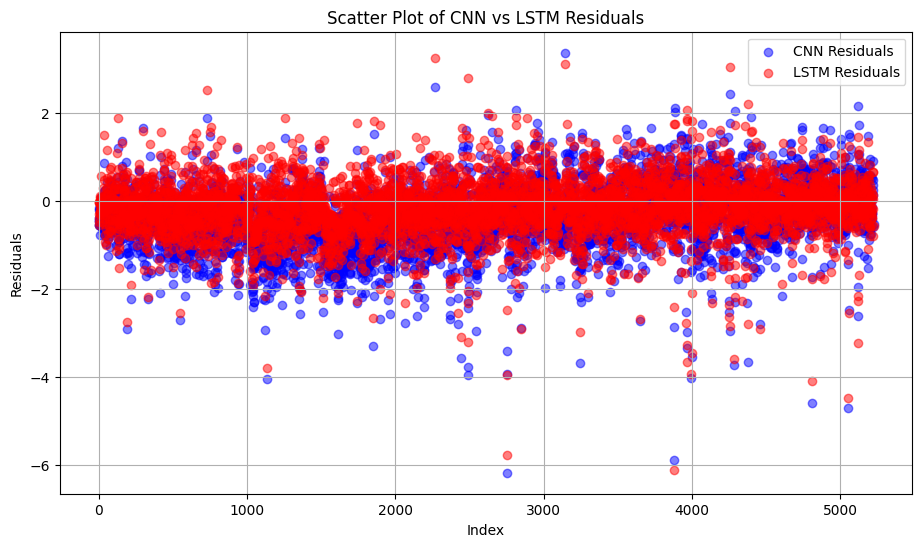

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
plt.scatter(merged_df.index, merged_df['residual_cnn'], color='blue', label='CNN Residuals', alpha=0.5)
plt.scatter(merged_df.index, merged_df['residual_lstm'], color='red', label='LSTM Residuals', alpha=0.5)
plt.title('Scatter Plot of CNN vs LSTM Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [10]:

merged_df['pred_1_avg'] = (merged_df['pred_1_cnn'] + merged_df['pred_1_lstm']) / 2
display(merged_df.head())

,pred_1_cnn,pred_1_lstm,actual,residual_cnn,residual_lstm,pred_1_avg
0,5.086417,5.098630,4.713,-0.373417,-0.385630,5.092523
1,5.301141,4.868786,4.854,-0.447141,-0.014786,5.084964
2,4.928560,4.979846,4.502,-0.426560,-0.477846,4.954203
3,4.835683,4.688456,4.643,-0.192683,-0.045456,4.762070
4,5.043163,4.795669,4.502,-0.541163,-0.293669,4.919416


In [11]:
merged_df['residual_avg'] = merged_df['actual'] - merged_df['pred_1_avg']
display(merged_df.head())

,pred_1_cnn,pred_1_lstm,actual,residual_cnn,residual_lstm,pred_1_avg,residual_avg
0,5.086417,5.098630,4.713,-0.373417,-0.385630,5.092523,-0.379523
1,5.301141,4.868786,4.854,-0.447141,-0.014786,5.084964,-0.230964
2,4.928560,4.979846,4.502,-0.426560,-0.477846,4.954203,-0.452203
3,4.835683,4.688456,4.643,-0.192683,-0.045456,4.762070,-0.119070
4,5.043163,4.795669,4.502,-0.541163,-0.293669,4.919416,-0.417416


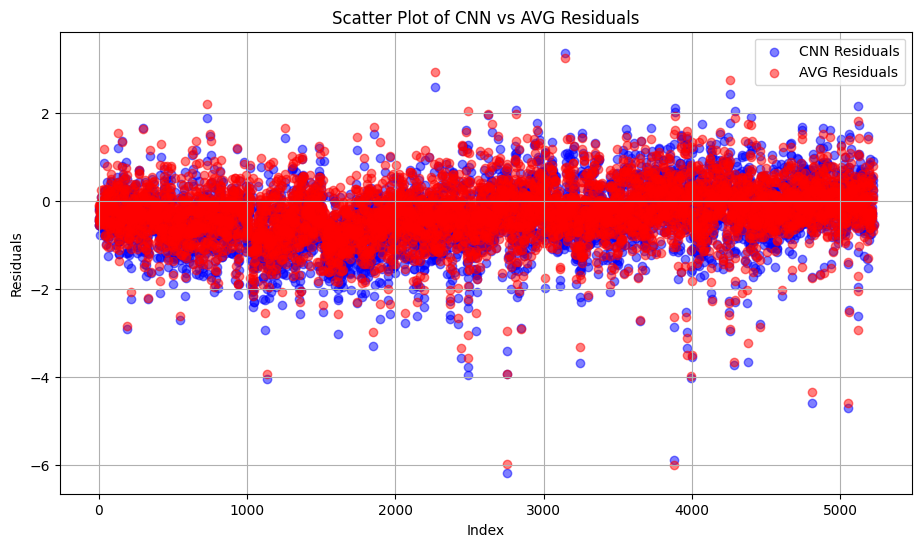

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
plt.scatter(merged_df.index, merged_df['residual_cnn'], color='blue', label='CNN Residuals', alpha=0.5)
plt.scatter(merged_df.index, merged_df['residual_avg'], color='red',  label='AVG Residuals', alpha=0.5)
plt.title('Scatter Plot of CNN vs AVG Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

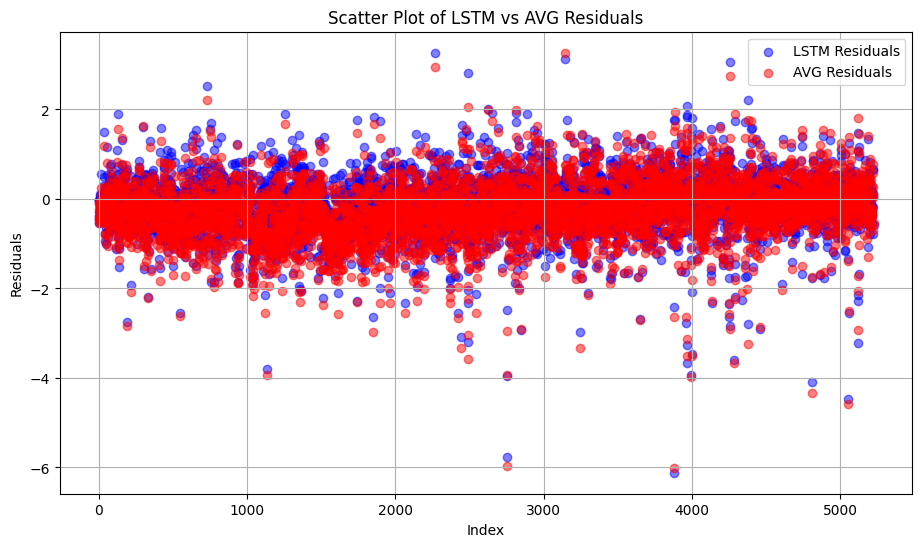

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(11, 6))
plt.scatter(merged_df.index, merged_df['residual_lstm'], color='blue', label='LSTM Residuals', alpha=0.5)
plt.scatter(merged_df.index, merged_df['residual_avg'], color='red',  label='AVG Residuals', alpha=0.5)
plt.title('Scatter Plot of LSTM vs AVG Residuals')
plt.xlabel('Index')
plt.ylabel('Residuals')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
correlation_matrix = merged_df[['residual_cnn', 'residual_lstm', 'residual_avg']].corr()
print("Correlation matrix for residuals:")
display(correlation_matrix)

Correlation matrix for residuals:


,residual_cnn,residual_lstm,residual_avg
residual_cnn,1.000000,0.867528,0.971221
residual_lstm,0.867528,1.000000,0.961030
residual_avg,0.971221,0.961030,1.000000


In [15]:
correlation_matrix1 = merged_df[['pred_1_cnn', 'pred_1_lstm', 'pred_1_avg','actual']].corr()
print("Correlation matrix for pred:")
display(correlation_matrix1)


Correlation matrix for pred:


,pred_1_cnn,pred_1_lstm,pred_1_avg,actual
pred_1_cnn,1.000000,0.995919,0.998925,0.982419
pred_1_lstm,0.995919,1.000000,0.999032,0.985565
pred_1_avg,0.998925,0.999032,1.000000,0.985038
actual,0.982419,0.985565,0.985038,1.000000
